In [1]:
import pandas as pd

df = pd.read_csv('tradelog.csv')



In [38]:
import numpy as np

In [40]:
import math

In [2]:
df.head()

,Unnamed: 0,Ticker,Entry Time,Entry Price,Exit Time,Exit Price
0,1,BANKNIFTY09JUL2022800PE,08-07-2020 09:29,301.00,08-07-2020 13:15,163.50
1,2,BANKNIFTY09JUL2022700CE,09-07-2020 09:29,166.75,09-07-2020 10:34,162.50
2,3,BANKNIFTY09JUL2022700PE,09-07-2020 09:29,147.00,09-07-2020 10:34,110.55
3,4,BANKNIFTY16JUL2022700CE,10-07-2020 09:29,437.55,10-07-2020 15:24,295.10
4,5,BANKNIFTY16JUL2022700PE,10-07-2020 09:29,403.15,10-07-2020 15:24,555.20


In [3]:
df.tail()

,Unnamed: 0,Ticker,Entry Time,Entry Price,Exit Time,Exit Price
244,245,BANKNIFTY31DEC2031300PE,29-12-2020 09:29,274.60,29-12-2020 13:10,216.65
245,246,BANKNIFTY31DEC2031200CE,30-12-2020 09:29,283.90,30-12-2020 10:24,248.25
246,247,BANKNIFTY31DEC2031200PE,30-12-2020 09:29,240.10,30-12-2020 10:24,221.70
247,248,BANKNIFTY31DEC2031300CE,31-12-2020 09:29,173.85,31-12-2020 10:37,161.80
248,249,BANKNIFTY31DEC2031300PE,31-12-2020 09:29,124.00,31-12-2020 10:37,105.05


In [4]:
df.dtypes

Unnamed: 0       int64
Ticker          object
Entry Time      object
Entry Price    float64
Exit Time       object
Exit Price     float64
dtype: object

In [5]:
df['Entry Time'] = pd.to_datetime(df['Entry Time'])

In [104]:
print("Converted Entry and Exit Time to proper datetime format for ease")

Converted Entry and Exit Time to proper datetime format for ease


In [6]:
df['Exit Time'] = pd.to_datetime(df['Exit Time'])

In [7]:
df.dtypes

Unnamed: 0              int64
Ticker                 object
Entry Time     datetime64[ns]
Entry Price           float64
Exit Time      datetime64[ns]
Exit Price            float64
dtype: object

In [8]:
df.head()

,Unnamed: 0,Ticker,Entry Time,Entry Price,Exit Time,Exit Price
0,1,BANKNIFTY09JUL2022800PE,2020-08-07 09:29:00,301.00,2020-08-07 13:15:00,163.50
1,2,BANKNIFTY09JUL2022700CE,2020-09-07 09:29:00,166.75,2020-09-07 10:34:00,162.50
2,3,BANKNIFTY09JUL2022700PE,2020-09-07 09:29:00,147.00,2020-09-07 10:34:00,110.55
3,4,BANKNIFTY16JUL2022700CE,2020-10-07 09:29:00,437.55,2020-10-07 15:24:00,295.10
4,5,BANKNIFTY16JUL2022700PE,2020-10-07 09:29:00,403.15,2020-10-07 15:24:00,555.20


In [105]:
Total_trades=df['Ticker'].count()
print("1st parameter- Total Trades")
print(Total_trades)

1st parameter- Total Trades
249


In [107]:
Total_Unique_trades=df['Ticker'].nunique()
print("Total unique trades are")
print(Total_Unique_trades)

Total unique trades are
219


In [11]:

df["Net Price"] = df["Exit Price"] - df["Entry Price"]

df.head()

,Unnamed: 0,Ticker,Entry Time,Entry Price,Exit Time,Exit Price,Net Price
0,1,BANKNIFTY09JUL2022800PE,2020-08-07 09:29:00,301.00,2020-08-07 13:15:00,163.50,-137.50
1,2,BANKNIFTY09JUL2022700CE,2020-09-07 09:29:00,166.75,2020-09-07 10:34:00,162.50,-4.25
2,3,BANKNIFTY09JUL2022700PE,2020-09-07 09:29:00,147.00,2020-09-07 10:34:00,110.55,-36.45
3,4,BANKNIFTY16JUL2022700CE,2020-10-07 09:29:00,437.55,2020-10-07 15:24:00,295.10,-142.45
4,5,BANKNIFTY16JUL2022700PE,2020-10-07 09:29:00,403.15,2020-10-07 15:24:00,555.20,152.05


In [12]:
df['Profit'] = df['Net Price'].apply(lambda x: 'Yes' if x > 0 else 'No')
df.head()

,Unnamed: 0,Ticker,Entry Time,Entry Price,Exit Time,Exit Price,Net Price,Profit
0,1,BANKNIFTY09JUL2022800PE,2020-08-07 09:29:00,301.00,2020-08-07 13:15:00,163.50,-137.50,No
1,2,BANKNIFTY09JUL2022700CE,2020-09-07 09:29:00,166.75,2020-09-07 10:34:00,162.50,-4.25,No
2,3,BANKNIFTY09JUL2022700PE,2020-09-07 09:29:00,147.00,2020-09-07 10:34:00,110.55,-36.45,No
3,4,BANKNIFTY16JUL2022700CE,2020-10-07 09:29:00,437.55,2020-10-07 15:24:00,295.10,-142.45,No
4,5,BANKNIFTY16JUL2022700PE,2020-10-07 09:29:00,403.15,2020-10-07 15:24:00,555.20,152.05,Yes


In [108]:

Profitable_trades = len(df[df["Profit"]=="Yes"])
print("2nd parameter-profitable trades")
print(Profitable_trades)




2nd parameter-profitable trades
96


In [109]:
loss_trades= len(df[df["Profit"]=="No"])
print("3rd parameter-loss making trades")
print(loss_trades)

3rd parameter-loss making trades
153


In [110]:
Total_trades=df['Ticker'].count()
print(Total_trades)

Profitable_trades = len(df[df["Profit"]=="Yes"])
print(Profitable_trades)
win_rate = (Profitable_trades/Total_trades)
print("4th paramter-win rate")
print(win_rate)


249
96
4th paramter-win rate
0.3855421686746988


In [112]:
Total_trades=df['Ticker'].count()
print(Total_trades)

total_profit=df.loc[df['Profit'] == 'Yes', 'Net Price'].sum()
print(total_profit)

Average_Profit_per_trade=(total_profit/Total_trades)
print("5th parameter average profit per trade")
print(Average_Profit_per_trade)



249
10132.2
5th parameter average profit per trade
40.691566265060246


In [28]:
Total_trades=df['Ticker'].count()
print('total trades =' , Total_trades)

total_l=df.loc[df['Profit'] == 'No', 'Net Price'].sum()
total_loss=-(total_l)
print('total loss=',total_loss)

Average_loss_per_trade=(total_loss/Total_trades)
print('Avg loss per trade',Average_loss_per_trade)


total trades = 249
total loss= 11642.6
Avg loss per trade 46.75742971887551


In [29]:
risk_reward=(Average_Profit_per_trade/Average_loss_per_trade)
print('Risk Reward',risk_reward)

Risk Reward 0.8702695274251456


In [30]:
win_rate = (Profitable_trades/Total_trades)
print('Win Rate',win_rate)

Win Rate 0.3855421686746988


In [31]:
loss_rate=(1-win_rate)
print('Loss rate',loss_rate)

Loss rate 0.6144578313253012


In [32]:
expectancy=[(win_rate*Average_Profit_per_trade)-(loss_rate*Average_loss_per_trade)]
print('Expectancy',expectancy)

Expectancy [-13.04215415880389]


In [33]:
initial_costs = df['Entry Price'].sum()
print('initial costs',initial_costs)

initial costs 73763.25


In [34]:
arr=(Average_Profit_per_trade/initial_costs)*100
print('Average Profit per trade',arr)

Average Profit per trade 0.055165094088262444


In [24]:
df['ROR']=(df['Net Price']/df['Entry Price'])*100
df.head()

,Unnamed: 0,Ticker,Entry Time,Entry Price,Exit Time,Exit Price,Net Price,Profit,ROR
0,1,BANKNIFTY09JUL2022800PE,2020-08-07 09:29:00,301.00,2020-08-07 13:15:00,163.50,-137.50,No,-45.681063
1,2,BANKNIFTY09JUL2022700CE,2020-09-07 09:29:00,166.75,2020-09-07 10:34:00,162.50,-4.25,No,-2.548726
2,3,BANKNIFTY09JUL2022700PE,2020-09-07 09:29:00,147.00,2020-09-07 10:34:00,110.55,-36.45,No,-24.795918
3,4,BANKNIFTY16JUL2022700CE,2020-10-07 09:29:00,437.55,2020-10-07 15:24:00,295.10,-142.45,No,-32.556279
4,5,BANKNIFTY16JUL2022700PE,2020-10-07 09:29:00,403.15,2020-10-07 15:24:00,555.20,152.05,Yes,37.715491


In [35]:
total_ROR=df.loc[df['Profit'] == 'Yes', 'ROR'].sum()
print('total ROR',total_ROR)

total ROR 3408.6789279509157


In [36]:
total_ROR_per_trade=(total_ROR/Total_trades)
print('total ROR per trade =',total_ROR_per_trade)  

total ROR per trade = 13.689473606228578


In [27]:
df['ROR']=(df['Net Price']/df['Entry Price'])*100
df.head()

,Unnamed: 0,Ticker,Entry Time,Entry Price,Exit Time,Exit Price,Net Price,Profit,ROR
0,1,BANKNIFTY09JUL2022800PE,2020-08-07 09:29:00,301.00,2020-08-07 13:15:00,163.50,-137.50,No,-45.681063
1,2,BANKNIFTY09JUL2022700CE,2020-09-07 09:29:00,166.75,2020-09-07 10:34:00,162.50,-4.25,No,-2.548726
2,3,BANKNIFTY09JUL2022700PE,2020-09-07 09:29:00,147.00,2020-09-07 10:34:00,110.55,-36.45,No,-24.795918
3,4,BANKNIFTY16JUL2022700CE,2020-10-07 09:29:00,437.55,2020-10-07 15:24:00,295.10,-142.45,No,-32.556279
4,5,BANKNIFTY16JUL2022700PE,2020-10-07 09:29:00,403.15,2020-10-07 15:24:00,555.20,152.05,Yes,37.715491


In [39]:
df['sd']= np.power((df['ROR']-total_ROR_per_trade),2)
df.head()

,Unnamed: 0,Ticker,Entry Time,Entry Price,Exit Time,Exit Price,Net Price,Profit,ROR,sd
0,1,BANKNIFTY09JUL2022800PE,2020-08-07 09:29:00,301.00,2020-08-07 13:15:00,163.50,-137.50,No,-45.681063,3524.860632
1,2,BANKNIFTY09JUL2022700CE,2020-09-07 09:29:00,166.75,2020-09-07 10:34:00,162.50,-4.25,No,-2.548726,263.679115
2,3,BANKNIFTY09JUL2022700PE,2020-09-07 09:29:00,147.00,2020-09-07 10:34:00,110.55,-36.45,No,-24.795918,1481.125395
3,4,BANKNIFTY16JUL2022700CE,2020-10-07 09:29:00,437.55,2020-10-07 15:24:00,295.10,-142.45,No,-32.556279,2138.669660
4,5,BANKNIFTY16JUL2022700PE,2020-10-07 09:29:00,403.15,2020-10-07 15:24:00,555.20,152.05,Yes,37.715491,577.249488


In [41]:
std_dev = math.sqrt((df['sd'].sum())/(Total_trades-1))
print('Standard Deviation',std_dev)

Standard Deviation 39.629365301525006


In [43]:
#ANSWER 10
Sharpe_ratio = (total_ROR-0.05)/std_dev
print('Sharpe Ratio is', Sharpe_ratio)

Sharpe Ratio is 86.01270552823479


In [44]:
#ANSWER 11
import matplotlib.pyplot as plt

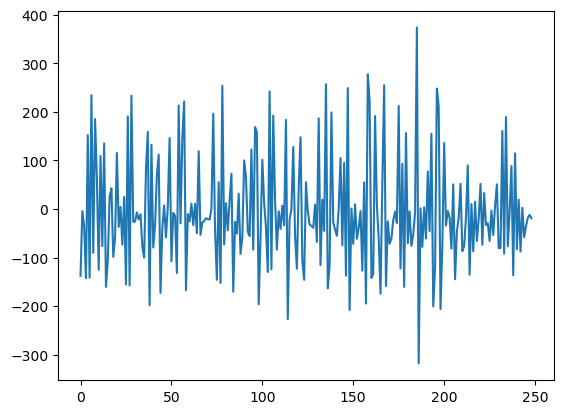

In [50]:
# plot a line graph
plt.plot(df["Net Price"])
#plt.text(df["Net Price"])
plt.show()

In [84]:
#df['cummulative_max']= df['Net Price'].cummax()
#df.head(20)


In [85]:
#df.drop('cummulative_max', axis=1, inplace=True)
#df.head()
#df.drop('cumm_max', axis=1, inplace=True)
#df.head(2)


In [65]:
df['cumm_sum'] = np.nan
df.head()
df.loc[0, 'cumm_sum'] = df['cumm_sum'].iloc[0]+200000
df.loc[1, 'cumm_sum'] = 0
df.head()


,Unnamed: 0,Ticker,Entry Time,Entry Price,Exit Time,Exit Price,Net Price,Profit,ROR,sd,cumm_sum,cumm_max
0,1,BANKNIFTY09JUL2022800PE,2020-08-07 09:29:00,301.00,2020-08-07 13:15:00,163.50,-137.50,No,-45.681063,3524.860632,200000.0,NaN
1,2,BANKNIFTY09JUL2022700CE,2020-09-07 09:29:00,166.75,2020-09-07 10:34:00,162.50,-4.25,No,-2.548726,263.679115,0.0,-137.50
2,3,BANKNIFTY09JUL2022700PE,2020-09-07 09:29:00,147.00,2020-09-07 10:34:00,110.55,-36.45,No,-24.795918,1481.125395,NaN,-4.25
3,4,BANKNIFTY16JUL2022700CE,2020-10-07 09:29:00,437.55,2020-10-07 15:24:00,295.10,-142.45,No,-32.556279,2138.669660,NaN,-4.25
4,5,BANKNIFTY16JUL2022700PE,2020-10-07 09:29:00,403.15,2020-10-07 15:24:00,555.20,152.05,Yes,37.715491,577.249488,NaN,-4.25


In [70]:
df['cumm_sum']= df['Net Price'].cumsum()
df.head(3)


,Unnamed: 0,Ticker,Entry Time,Entry Price,Exit Time,Exit Price,Net Price,Profit,ROR,sd,cumm_sum,cumm_max
0,1,BANKNIFTY09JUL2022800PE,2020-08-07 09:29:00,301.00,2020-08-07 13:15:00,163.50,-137.50,No,-45.681063,3524.860632,-137.50,NaN
1,2,BANKNIFTY09JUL2022700CE,2020-09-07 09:29:00,166.75,2020-09-07 10:34:00,162.50,-4.25,No,-2.548726,263.679115,-141.75,-137.50
2,3,BANKNIFTY09JUL2022700PE,2020-09-07 09:29:00,147.00,2020-09-07 10:34:00,110.55,-36.45,No,-24.795918,1481.125395,-178.20,-4.25


In [71]:
df.loc[0, 'cumm_sum'] = df['cumm_sum'].iloc[0]+200000
df.head(2)

,Unnamed: 0,Ticker,Entry Time,Entry Price,Exit Time,Exit Price,Net Price,Profit,ROR,sd,cumm_sum,cumm_max
0,1,BANKNIFTY09JUL2022800PE,2020-08-07 09:29:00,301.00,2020-08-07 13:15:00,163.5,-137.50,No,-45.681063,3524.860632,199862.50,NaN
1,2,BANKNIFTY09JUL2022700CE,2020-09-07 09:29:00,166.75,2020-09-07 10:34:00,162.5,-4.25,No,-2.548726,263.679115,-141.75,-137.5


In [75]:
df['cumm_sum_1']=df['cumm_sum'].cumsum()
df.head()

,Unnamed: 0,Ticker,Entry Time,Entry Price,Exit Time,Exit Price,Net Price,Profit,ROR,sd,cumm_sum,cumm_sum_1
0,1,BANKNIFTY09JUL2022800PE,2020-08-07 09:29:00,301.00,2020-08-07 13:15:00,163.50,-137.50,No,-45.681063,3524.860632,199862.50,199862.50
1,2,BANKNIFTY09JUL2022700CE,2020-09-07 09:29:00,166.75,2020-09-07 10:34:00,162.50,-4.25,No,-2.548726,263.679115,-141.75,199720.75
2,3,BANKNIFTY09JUL2022700PE,2020-09-07 09:29:00,147.00,2020-09-07 10:34:00,110.55,-36.45,No,-24.795918,1481.125395,-178.20,199542.55
3,4,BANKNIFTY16JUL2022700CE,2020-10-07 09:29:00,437.55,2020-10-07 15:24:00,295.10,-142.45,No,-32.556279,2138.669660,-320.65,199221.90
4,5,BANKNIFTY16JUL2022700PE,2020-10-07 09:29:00,403.15,2020-10-07 15:24:00,555.20,152.05,Yes,37.715491,577.249488,-168.60,199053.30


In [96]:
df['cumm_max']=df['cumm_sum_1'].cummax()
df['cumm_max_2']=df['Net Price'].cummax()
df.head()

,Unnamed: 0,Ticker,Entry Time,Entry Price,Exit Time,Exit Price,Net Price,Profit,ROR,sd,cumm_sum,cumm_sum_1,cumm_max,cumm_max_2
0,1,BANKNIFTY09JUL2022800PE,2020-08-07 09:29:00,301.00,2020-08-07 13:15:00,163.50,-137.50,No,-45.681063,3524.860632,199862.50,199862.50,199862.5,-137.50
1,2,BANKNIFTY09JUL2022700CE,2020-09-07 09:29:00,166.75,2020-09-07 10:34:00,162.50,-4.25,No,-2.548726,263.679115,-141.75,199720.75,199862.5,-4.25
2,3,BANKNIFTY09JUL2022700PE,2020-09-07 09:29:00,147.00,2020-09-07 10:34:00,110.55,-36.45,No,-24.795918,1481.125395,-178.20,199542.55,199862.5,-4.25
3,4,BANKNIFTY16JUL2022700CE,2020-10-07 09:29:00,437.55,2020-10-07 15:24:00,295.10,-142.45,No,-32.556279,2138.669660,-320.65,199221.90,199862.5,-4.25
4,5,BANKNIFTY16JUL2022700PE,2020-10-07 09:29:00,403.15,2020-10-07 15:24:00,555.20,152.05,Yes,37.715491,577.249488,-168.60,199053.30,199862.5,152.05


In [79]:
FP=df.cumm_max.unique()

array([199862.5])

In [95]:
#ANSWER 12
#peak value
PV = 200000
#lowest value from cumm_max_2
LP = -137.50
max_drawdown = ((LP-PV)/PV) * 100
print('MAX DRAWDOWN IS :' ,max_drawdown,'%')

MAX DRAWDOWN IS : -100.06875 %


In [92]:
#ANSWER 13
no_of_days = df['Entry Time'].nunique()
print(no_of_days)

123


In [87]:
#The CAGR formula is equal to (Ending Value/Beginning Value) ^ (1/No. of Periods) – 1.
rows =  len(df.axes[0])
print(rows)

249


In [90]:
df.tail(2)

,Unnamed: 0,Ticker,Entry Time,Entry Price,Exit Time,Exit Price,Net Price,Profit,ROR,sd,cumm_sum,cumm_sum_1,cumm_max,cumm_max_2
247,248,BANKNIFTY31DEC2031300CE,2020-12-31 09:29:00,173.85,2020-12-31 10:37:00,161.80,-12.05,No,-6.931263,425.214761,-1491.45,86654.25,199862.5,373.7
248,249,BANKNIFTY31DEC2031300PE,2020-12-31 09:29:00,124.00,2020-12-31 10:37:00,105.05,-18.95,No,-15.282258,839.361236,-1510.40,85143.85,199862.5,373.7


In [91]:
BV= df.loc[0, 'Net Price']
EV= df.loc[248, 'Net Price']
print(BV)
print(EV)

-137.5
-18.950000000000003


In [94]:
CAGR = ((EV/BV)**(1/no_of_days))-1
print(CAGR)

-0.01598324792302408


In [97]:
#ANSWER 14
#Calmar Ratio = Average Annual Rate of Return / Maximum Drawdown
total_ROR_per_trade

13.689473606228578

In [100]:
avg_annual_ROR = (df['ROR'].sum())/no_of_days
print(avg_annual_ROR)

-3.9845231089392352


In [101]:
Calmar_Ratio = avg_annual_ROR /max_drawdown
print('CALMAR RATIO IS :',Calmar_Ratio)

CALMAR RATIO IS : 0.039817856313177045


In [103]:
print(' Calmar ratio the better with anything over 0.50 is considered to be good. A Calmar ratio of 3.0 to 5.0 is really good, our Calmar ratio is below 0.05 , hence as per the above parameter analysis, the numbers show that the Strategy is not advisable')

 Calmar ratio the better with anything over 0.50 is considered to be good. A Calmar ratio of 3.0 to 5.0 is really good, our Calmar ratio is below 0.05 , hence as per the above parameter analysis, the numbers show that the Strategy is not advisable
